In [1]:
import numpy as np

In [2]:
img=np.array([[62,48,54,29,63],[36,47,58,76,65],[52,67,72,65,69]])

In [3]:
img

array([[62, 48, 54, 29, 63],
       [36, 47, 58, 76, 65],
       [52, 67, 72, 65, 69]])

In [4]:
m,n=img.shape

In [7]:
mask=np.ones([3,3],dtype=int)
mask=mask/9

In [8]:
img_new=np.zeros([m,n])

In [9]:
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)

In [10]:
img_new

array([[ 0,  0,  0,  0,  0],
       [ 0, 55, 57, 61,  0],
       [ 0,  0,  0,  0,  0]], dtype=uint8)

In [13]:
img2=np.array([[11654,11560, 11607, 11634, 11862],[10560, 11237, 11360, 11762, 11891],[10783,11450,11625, 11946,13558], [11245, 11560, 11768, 11965, 12430], [11482, 10180, 11978, 12540, 12065]])

In [14]:
img2

array([[11654, 11560, 11607, 11634, 11862],
       [10560, 11237, 11360, 11762, 11891],
       [10783, 11450, 11625, 11946, 13558],
       [11245, 11560, 11768, 11965, 12430],
       [11482, 10180, 11978, 12540, 12065]])

In [15]:
def stretch(image, minimum, maximum):
    image = (image - minimum) / (maximum - minimum)
    image[image < 0] = 0
    image[image > 1] = 1
    return image

In [18]:
stre=stretch(img2, img2.min(), img2.max())

In [19]:
stre

array([[0.43635287, 0.40852575, 0.42243931, 0.43043221, 0.49792777],
       [0.1124926 , 0.31290705, 0.34931912, 0.46832445, 0.50651273],
       [0.17850799, 0.37596211, 0.42776791, 0.52279455, 1.        ],
       [0.31527531, 0.40852575, 0.47010065, 0.52841918, 0.6660746 ],
       [0.38543517, 0.        , 0.53226761, 0.69863825, 0.5580225 ]])

In [20]:
2**16

65536

In [21]:
0.47010065*65535

30808.04609775

In [2]:
img3=np.array([[24,47,31,20,36,52,29,44],[41,52,25,44,53,31,24,50],[38,45,50,35,22,41,47,33],[55,20,27,52,45,25,38,42],[49,51,41,32,24,52,44,29],[24,42,29,36,49,32,55,22],[44,50,22,41,31,25,32,41],[29,33,20,55,49,38,45,24]])

In [3]:
img3

array([[24, 47, 31, 20, 36, 52, 29, 44],
       [41, 52, 25, 44, 53, 31, 24, 50],
       [38, 45, 50, 35, 22, 41, 47, 33],
       [55, 20, 27, 52, 45, 25, 38, 42],
       [49, 51, 41, 32, 24, 52, 44, 29],
       [24, 42, 29, 36, 49, 32, 55, 22],
       [44, 50, 22, 41, 31, 25, 32, 41],
       [29, 33, 20, 55, 49, 38, 45, 24]])

In [13]:
from skimage import exposure

def hist_eq(image):
    hist, bins = exposure.histogram(image, nbins=256, normalize=False)
    # append any remaining 0 values to the histogram
    hist = np.hstack((hist, np.zeros((255 - bins[-1])))) 
    cdf = 255*(hist/hist.sum()).cumsum()
    equalized = cdf[image].astype(np.uint8)

    return equalized

In [14]:
eq=hist_eq(img3)

In [15]:
eq

array([[175, 255, 223, 131, 255, 255, 207, 255],
       [255, 255, 187, 255, 255, 223, 175, 255],
       [255, 255, 255, 255, 159, 255, 255, 243],
       [255, 131, 195, 255, 255, 187, 255, 255],
       [255, 255, 255, 239, 175, 255, 255, 207],
       [175, 255, 207, 255, 255, 239, 255, 159],
       [255, 255, 159, 255, 223, 187, 239, 255],
       [207, 243, 131, 255, 255, 255, 255, 175]], dtype=uint8)

In [16]:
import matplotlib.pyplot as plt

(array([[0., 2., 1., 0., 0., 1., 2., 0., 1., 1.],
        [1., 0., 0., 1., 0., 0., 1., 2., 2., 1.],
        [2., 1., 2., 1., 0., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 2., 0., 2., 0., 0., 2.],
        [1., 1., 0., 1., 1., 0., 0., 1., 2., 1.],
        [0., 2., 0., 2., 0., 1., 1., 0., 0., 2.],
        [0., 1., 1., 1., 0., 1., 1., 2., 0., 1.],
        [1., 1., 1., 1., 0., 0., 3., 0., 1., 0.]]),
 array([20. , 23.5, 27. , 30.5, 34. , 37.5, 41. , 44.5, 48. , 51.5, 55. ]),
 <a list of 8 Lists of Patches objects>)

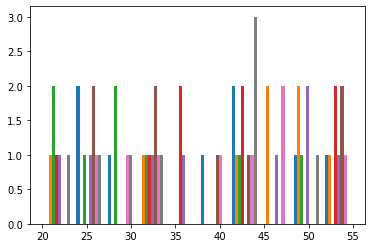

In [21]:
plt.hist(img3)

In [19]:
plt.show()

In [20]:
img3

array([[24, 47, 31, 20, 36, 52, 29, 44],
       [41, 52, 25, 44, 53, 31, 24, 50],
       [38, 45, 50, 35, 22, 41, 47, 33],
       [55, 20, 27, 52, 45, 25, 38, 42],
       [49, 51, 41, 32, 24, 52, 44, 29],
       [24, 42, 29, 36, 49, 32, 55, 22],
       [44, 50, 22, 41, 31, 25, 32, 41],
       [29, 33, 20, 55, 49, 38, 45, 24]])

TypeError: only size-1 arrays can be converted to Python scalars

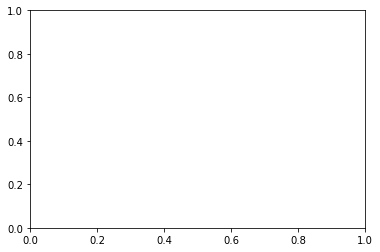

In [24]:
plt.bar(7,img3)